In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
uebb = dl.load_uebb_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
dataset_name = "uebb"
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["power", "air_density", 'wind_speed_nacelle', 
                    "sonic_wind_direction", "sonic_wind_speed", 
                    'ws_w_corrected', 'wind_speed_cube2', 'relative_humidity1',
                    'wind_speed2', 'wind_direction2', 'wind_speed_std1', 'wind_speed_max1']
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
models_names = ["linreg", "linreg", "linreg"]

## Run models

In [4]:
models = run.pipeline(uebb, models_names, dataset_name, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

Finished training on uebb for 10min horizon
Finished training on uebb for 1 hour horizon
Finished training on uebb for 1 day horizon


## Evaluate results

In [5]:
visualizations.plot_metrics("Beberide", models)

| Model Name              |     RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|---------:|-----------------:|---------:|----------------:|
| Beberide 10min horizon  |  52.4074 |          55.4172 |  34.5282 |         36.245  |
| Beberide 1 hour horizon | 110.986  |         119.25   |  79.5638 |         81.9437 |
| Beberide 1 day horizon  | 178.003  |         196.742  | 130.404  |        151.508  |


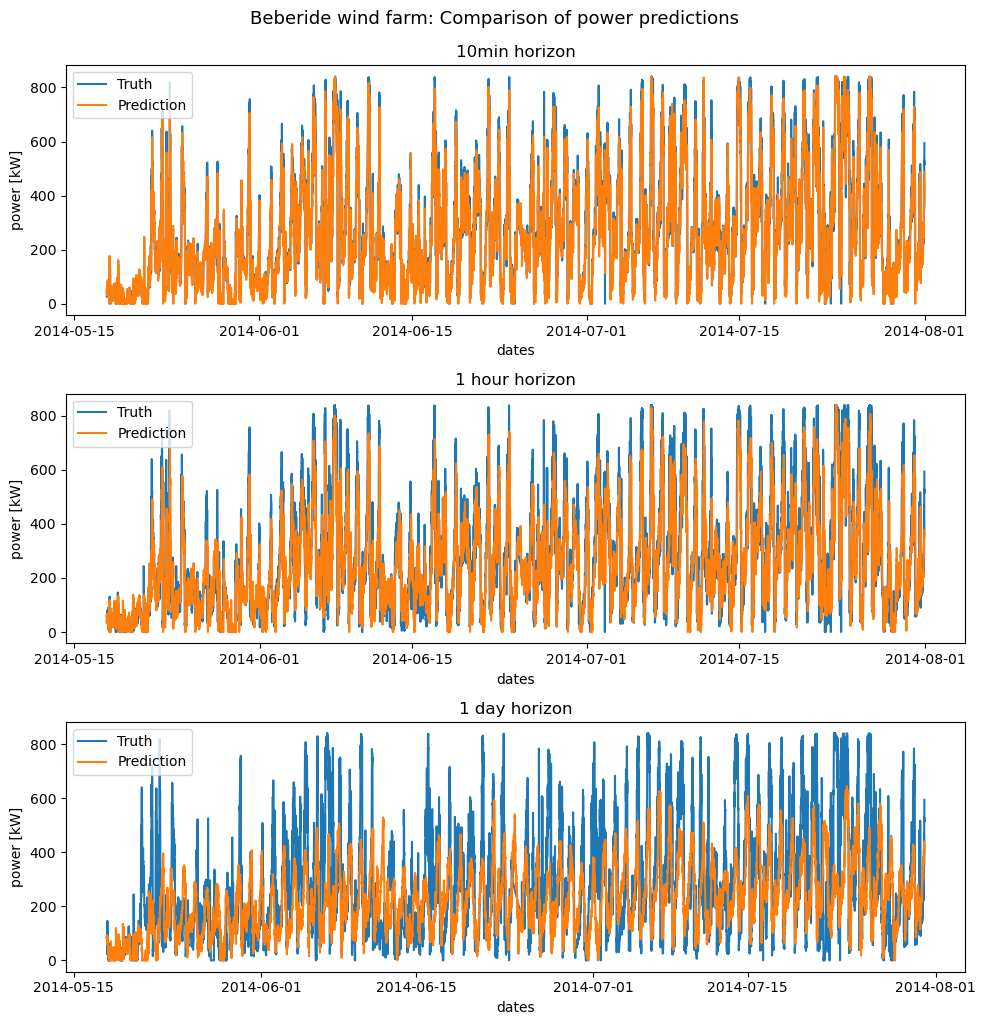

In [6]:
visualizations.plot_models("Beberide", models)